# CS3033/CS6405 - Data Mining - Second Assignment

### Submission

This assignment is **due on 15/04/22 at 23:59**. You should submit a single .ipnyb file with your python code and analysis electronically via Canvas.
Please note that this assignment will account for 25 Marks of your module grade.

### Declaration

By submitting this assignment. I agree to the following:

<font color="red">“I have read and understand the UCC academic policy on plagiarism, and agree to the requirements set out thereby in relation to plagiarism and referencing. I confirm that I have referenced and acknowledged properly all sources used in the preparation of this assignment.
I declare that this assignment is entirely my own work based on my personal study. I further declare that I have not engaged the services of another to either assist me in, or complete this assignment”</font>

### Objective

The Boolean satisfiability (SAT) problem consists in determining whether a Boolean formula F is satisfiable or not. F is represented by a pair (X, C), where X is a set of Boolean variables and C is a set of clauses in Conjunctive Normal Form (CNF). Each clause is a disjunction of literals (a variable or its negation). This problem is one of the most widely studied combinatorial problems in computer science. It is the classic NP-complete problem. Over the past number of decades, a significant amount of research work has focused on solving SAT problems with both complete and incomplete solvers.

One of the most successful approaches is an algorithm portfolio, where a solver is selected among a set of candidates depending on the problem type. Your task is to create a classifier that takes as input the SAT instance's features and identifies the class.

In this project, we represent SAT problems with a vector of 327 features with general information about the problem, e.g., number of variables, number of clauses, the fraction of horn clauses in the problem, etc. There is no need to understand the features to be able to complete the assignment.


The original dataset is available at:
https://github.com/bprovanbessell/SATfeatPy/blob/main/features_csv/all_features.csv



## Data Preparation

In [ ]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/andvise/DataAnalyticsDatasets/main/train_dataset.csv", index_col=0)
df.head()

c    v  clauses_vars_ratio  vars_clauses_ratio  vcg_var_mean  \
0  608   71            8.563380            0.116776      0.045172   
1  615   70            8.785714            0.113821      0.049617   
2  926  105            8.819048            0.113391      0.033385   
3  603   70            8.614286            0.116086      0.049799   
4  228   43            5.302326            0.188596      0.067319   

   vcg_var_coeff  vcg_var_min  vcg_var_max  vcg_var_entropy  vcg_clause_mean  \
0       0.173688     0.029605     0.060855         2.802758         0.045172   
1       0.168633     0.032520     0.069919         2.607264         0.049617   
2       0.186444     0.017279     0.047516         3.022879         0.033385   
3       0.133441     0.033167     0.063018         2.688342         0.049799   
4       0.162581     0.048246     0.087719         2.203308         0.067319   

   ...  rwh_0_max   rwh_1_mean  rwh_1_coeff     rwh_1_min    rwh_1_max  \
0  ...  5078250.0  1056.695041     1.000000  2.981935e-09  2113.390083   
1  ...  5469376.0  1207.488426     1.000000  6.927306e-28  2414.976852   
2  ...  4297025.0   441.327046     1.000000  1.194627e-76   882.654092   
3  ...  6640651.0  1181.583331     1.000000  2.437278e-30  2363.166661   
4  ...  2437500.0  1091.423921     0.999966  3.723599e-02  2182.810606   

    rwh_2_mean  rwh_2_coeff      rwh_2_min    rwh_2_max    target  
0  1081.900778          1.0   1.302080e-29  2163.801556  matching  
1  1186.623627          1.0  3.491123e-120  2373.247255  matching  
2   474.697562          1.0   0.000000e+00   949.395124  matching  
3  1149.059132          1.0  4.670090e-147  2298.118264  matching  
4  1296.888087          1.0   6.307424e-06  2593.776167  matching  

[5 rows x 328 columns]

In [ ]:
# Label or target variable
df['target'].value_counts()

tseitin           298
dominating        294
cliquecoloring    268
php               266
subsetcard        263
op                201
tiling            120
5clique           108
3color            104
matching          102
5color             98
4color             98
3clique            98
4clique            94
Name: target, dtype: int64

It appears that the dataset is to some extent imbalanced, with some individual target variables being significantly over-represented (like 'tseitin') in comparison to some like '4clique' which are under-represented.



---



# Tasks

## Basic models and evaluation (5 Marks)

Using Scikit-learn, train and evaluate a decision tree classifier using 70% of the dataset from training and 30% for testing. For this part of the project, we are not interested in optimising the parameters; we just want to get an idea of the dataset.

In [ ]:
import numpy as np

df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.fillna(0)

# due to getting "ValueError: Input X contains infinity or a value too large for dtype('float64')." in trial attempts, code above is inserted to remedy the error

In [ ]:
print(df.dtypes)
#the target variable is a string, so encoding of it into a numerical format must be done

c                       int64
v                       int64
clauses_vars_ratio    float64
vars_clauses_ratio    float64
vcg_var_mean          float64
                       ...   
rwh_2_mean            float64
rwh_2_coeff           float64
rwh_2_min             float64
rwh_2_max             float64
target                 object
Length: 328, dtype: object


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Features/target split
X = df.iloc[:,:-1]
y = df.iloc[:,-1] #-1 is the last column i.e. 'target'

# Encoding a categorical column into a numerical vector
encoder = LabelEncoder()
y = encoder.fit_transform(y)

Although the label values have no specific ordering, the learning algorithm  now assumes that a certain value from the target variable column is larger than another value from the same column, and so on for the remaining values.

Despite an incorrect assumption being introduced, the algorithm could still produce useful results.

In [ ]:
# To verify that encoding was successful - observing the numbers each label took on

y_decoded = encoder.inverse_transform(y)

# Print of encoded and decoded values side by side
print("Encoded\t\tDecoded")
for e, d in zip(y, y_decoded):
    print(f"{e}\t\t{d}")

Encoded		Decoded
8		matching
8		matching
8		matching
8		matching
8		matching
8		matching
8		matching
8		matching
8		matching
8		matching
8		matching
8		matching
8		matching
8		matching
8		matching
8		matching
8		matching
8		matching
8		matching
8		matching
8		matching
8		matching
8		matching
8		matching
8		matching
8		matching
8		matching
8		matching
8		matching
8		matching
8		matching
8		matching
8		matching
8		matching
8		matching
8		matching
8		matching
8		matching
8		matching
8		matching
8		matching
8		matching
8		matching
8		matching
8		matching
8		matching
8		matching
8		matching
8		matching
8		matching
8		matching
8		matching
8		matching
8		matching
8		matching
8		matching
8		matching
8		matching
8		matching
8		matching
8		matching
8		matching
8		matching
8		matching
8		matching
8		matching
8		matching
8		matching
8		matching
8		matching
8		matching
8		matching
8		matching
8		matching
8		matching
8		matching
8		matching
8		matching
8		matching
8		matching
8		matching
8		matching

In [ ]:
# Splitting the dataset into 70% training vs. 30% test

from sklearn import model_selection

train_X, test_X, train_y, test_y = model_selection.train_test_split(X, y, test_size=0.3, random_state=4)

In [ ]:
# To verify whether 70/30 split was successful:

print('training set features:', train_X.shape)
print('training set labels:', train_y.shape)
print('-----------------------------------')
print('test set features:', test_X.shape)
print('test set labels:', test_y.shape)

training set features: (1688, 327)
training set labels: (1688,)
-----------------------------------
test set features: (724, 327)
test set labels: (724,)


In [ ]:
# Setting up the classifier 

from sklearn import tree

dtc = tree.DecisionTreeClassifier() #leaving default values for the basic model task

The default value for the function to measure the quality of a split within the DecisionTreeClassifier is "gini". 

Altough in lectures we disscussed "entropy", leaving the default i.e. "gini" should not have a significant impact on the performance of the algorithm. The main reason is that the principal difference between "entropy" and "gini" is that "entropy" is a more computationally expensive measure, as it involves logarithmic calculations, whereas "gini" is simpler to calculate.

In [ ]:
# Train then test on the unseen testset

dtc = dtc.fit(train_X, train_y) 
print('Test Accuracy:', dtc.score(test_X, test_y))

Test Accuracy: 0.9585635359116023


The accuracy obtained from evaluation of the model on the test set is 95.86%

In [ ]:
# Plotting the decision tree

import matplotlib.pyplot as plt

plt.figure(figsize=(120, 120)) 
tree.plot_tree(dtc, feature_names = X.columns, filled = True, rounded = True)

[Text(0.6968691259398496, 0.9705882352941176, 'c_nd_n_node_std <= 1.067\ngini = 0.912\nsamples = 1688\nvalue = [68, 75, 62, 67, 71, 68, 183, 205, 73, 146, 189\n185, 91, 205]'),
 Text(0.45388862781954886, 0.9117647058823529, 'big_node_max <= 3.5\ngini = 0.906\nsamples = 1471\nvalue = [68, 75, 62, 67, 71, 68, 174, 205, 73, 146, 189\n181, 91, 1]'),
 Text(0.15037593984962405, 0.8529411764705882, 'pnc_ratio_mean <= 0.783\ngini = 0.499\nsamples = 326\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 143, 0, 181, 1, 1]'),
 Text(0.13032581453634084, 0.7941176470588235, 'c_nd_p_node_mean <= 1.795\ngini = 0.027\nsamples = 145\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 143, 0, 0, 1, 1]'),
 Text(0.11027568922305764, 0.7352941176470589, 'gini = 0.0\nsamples = 143\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 143, 0, 0, 0, 0]'),
 Text(0.15037593984962405, 0.7352941176470589, 'unit_props_at_depth_64 <= 0.417\ngini = 0.5\nsamples = 2\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]'),
 Text(0.13032581453634084, 0.676470588235

Plotting a decision tree can be useful for evaluating the performance of dtc because it:

1. Allows to see how the decision-making process works. Each node = decision based on a feature values VS. branches = outcomes of decision.

2. Allow to identify the most important features of the classifier- those higher up are more important in determining the classification outcome --> here it is "c_nd_node_std" as the root node. 

In [ ]:
# Plotting a confusion matrix

#from sklearn import metrics
#metrics.plot_confusion_matrix(dtc, test_X, test_y)
#plt.show()

#above code from the lecture PDF is 'outdatted', so did:

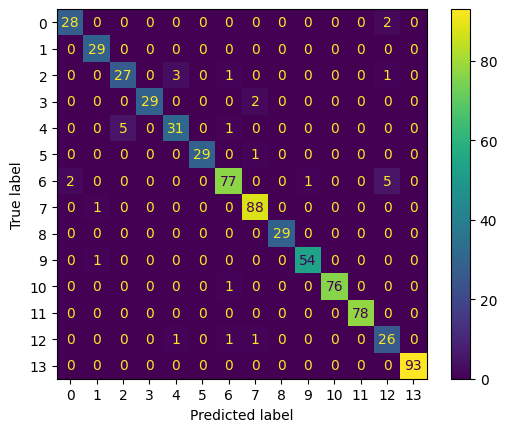

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions = dtc.predict(test_X)

cm = confusion_matrix(test_y, predictions, labels=dtc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtc.classes_)
disp.plot()
plt.show()

Overall, the values in diagonal cells of the matrix correspond to the number of instances where the true and predicted labels match. 

The off-diagonal entries represent the instances where the decision tree classifier made a mistake.

All in all, the basic model classifier seems to be performing well. 
The computed accuracy is 95.86%

There is slightly more missclasification with algorithm solvers with less samples i.e. they are having lower scores. For example, category with true label 4- '5clique' has 6/37 misclassified. The possible reason for this is that the dataset is imbalanced so there is bias towards majority classes and poorer classification accuracy for minority classes. 

Algorithm solver with true label 6 also has a fairily high number of missclassifications (8/85). 
However, if precision is to be considered, how many of those classified as positive (i.e., belonging to the target label) are actually positive, then solver with true label 6 has a better classification performance (0.91) than solver with true label 4 (0.84)




---



## Robust evaluation (10 Marks)

In this section, we are interested in more rigorous techniques by implementing more sophisticated methods, for instance:
* Hold-out and cross-validation.
* Hyper-parameter tuning.
* Feature reduction.
* Feature selection.
* Feature normalisation.

Your report should provide concrete information about your reasoning; everything should be well-explained.

The key to geting good marks is to show that you evaluated different methods and that you correctly selected the configuration.



---



In [ ]:
# Prepare the environment: 

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, chi2


df = pd.read_csv("https://raw.githubusercontent.com/andvise/DataAnalyticsDatasets/main/train_dataset.csv", index_col=0)

In [ ]:
import numpy as np
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.fillna(0)

# Feature normalisation- suplementing the basic model with scaling of features

In [ ]:
def dtc_scaler(df):

    X = df.iloc[:,:-1]  # Features
    y = df.iloc[:,-1] # Labels 

    # Encoding nominal categorical labels into numeric format
    encoder = LabelEncoder()
    y = encoder.fit_transform(y)

    # Train/test split
    train_X, test_X, train_y, test_y = model_selection.train_test_split(X, y, test_size=0.3, random_state=4)

    # Feature normalisation via min-max scaling
    scaler = MinMaxScaler()
    train_X = scaler.fit_transform(train_X)
    test_X = scaler.transform(test_X)

    # Creating the decision tree clasifier object
    clf_scaler = tree.DecisionTreeClassifier()

    # Training the classifier
    clf_scaler = clf_scaler.fit(train_X, train_y) 
    clf_score = print('Test Accuracy:', clf_scaler.score(test_X, test_y))

    # Plotting of the decision tree
    plt.figure(figsize=(120, 120)) 
    tree.plot_tree(clf_scaler, feature_names = X.columns, filled = True, rounded = True)

    # Plotting of the confusion matrix
    predictions = clf_scaler.predict(test_X)
    cm = confusion_matrix(test_y, predictions, labels=clf_scaler.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_scaler.classes_)
    disp.plot()
    plt.show()

Test Accuracy: 0.9654696132596685


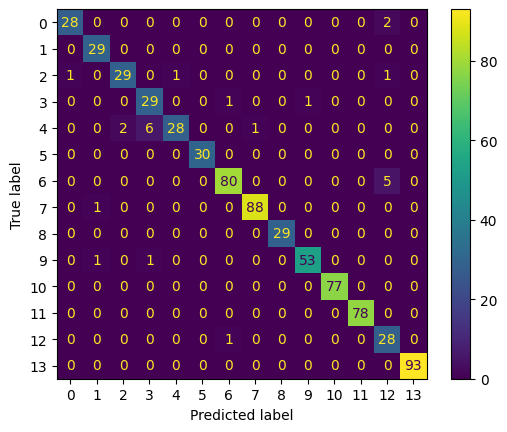

In [ ]:
dtc_scaler(df)

96.55% accuracy has been achieved through the normalisation of the features in the dataset. This brings better performance compared to the basic model (95.86%).

Since some of the features are continuous and have a large range of values, scaling may be helpful to ensure that the decision tree is not biased towards these features. For that reason, min-max scaling will be carried in analysis forward. 

To further investigate whether the notion disscussed in the lectures that scaling could interfer with the representation of decision boundaries applies here, it can be seen that the same root node is on the plot of the decision tree as well as the nodes further down - the analysis can be proceeded with feature normalisation.

Also, once again, there is a pattern of more missclasification on true labels with smaller sample sizes; however, previous categories with a lot of instances of missclassification from the smaller sample size group e.g. true label 2 has now improved. This is possibly because the majority of the misclassified instances had feature values that were in extremes of the range of values. Furthermore, features that are most important for assigning labels were the ones that showed the most improvement in classification accuracy after min-max scaling.

# Repeated K-fold Cross-validation

In [ ]:
def dtc_rkCV(df):

    X = df.iloc[:,:-1]  # Features
    y = df.iloc[:,-1] # Labels 

    # Encoding nominal categorical labels into numeric format
    encoder = LabelEncoder()
    y = encoder.fit_transform(y)

    # Train/test split
    train_X, test_X, train_y, test_y = model_selection.train_test_split(X, y, test_size=0.3, random_state=4)

    # Feature normalisation via min-max scaling
    scaler = MinMaxScaler()
    train_X = scaler.fit_transform(train_X)
    test_X = scaler.transform(test_X)

    # Creating the decision tree clasifier object
    dtc_rkCV = tree.DecisionTreeClassifier()

    # Training the classifier
    dtc_rkCV = dtc_rkCV.fit(train_X, train_y) 

    # Repated cross-validation
    rkf = RepeatedKFold(n_splits=5, n_repeats=5, random_state= 4) #  5-fold K-Fold repeated 5 times
    scores = model_selection.cross_val_score(dtc_rkCV, train_X, train_y, cv=rkf) 
    # Print mean and st dev
    print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

    clf_score = print('Test Accuracy:', dtc_rkCV.score(test_X, test_y))

    # Plotting of the confusion matrix
    predictions = dtc_rkCV.predict(test_X)
    cm = confusion_matrix(test_y, predictions, labels=dtc_rkCV.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtc_rkCV.classes_)
    disp.plot()
    plt.show()

0.97 accuracy with a standard deviation of 0.01
Test Accuracy: 0.9709944751381215


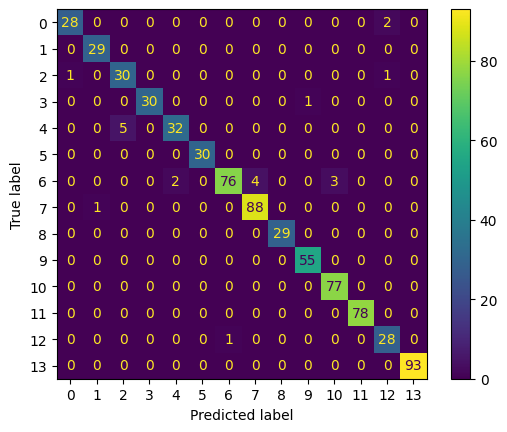

In [ ]:
dtc_rkCV(df)

note: as it was time-consuming to plot a decision tree for each trial, and considering how a confusion matrix is an informative enough of an evaluation, further investigations won't include the decision tree plot. 

97% accuracy was obtained from repeated k-fold cross-validation, whereas when evaluated on the test set, an accuracy of 97.10% was accomplished. 
This is a slight improvement compared to the accuracy of the basic model (95.86).

Repeating k-fold cross-validation allowed to evaluate the performance of the model on multiple different splits of data - it ensured that the model's performance was consistent across multiple splits of the data and that the results are not due to chance variations.

Furthermore, even though algorithm solver with a true label of 4 ('5clique') still seems to perform poorer relative to other solvers, there seems to be a slight improvement in the rate of missclasification for other solvers with smaller sample sizes - this should explain the higher accuracy obtained from the evaluation of the model on the test set.

Overall, repeated k-fold cross validation is a useful step that leads to an improvement in the performance of the model, therefore it will be implmented in further modifications.

# Feature reduction (extraction) - PCA for dimensionality reduction

In [ ]:
def dtc_pca(df):

    X = df.iloc[:,:-1]  # Features
    y = df.iloc[:,-1] # Labels 

    # Encoding nominal categorical labels into numeric format
    encoder = LabelEncoder()
    y = encoder.fit_transform(y)

    # Train/test split
    train_X, test_X, train_y, test_y = model_selection.train_test_split(X, y, test_size=0.3, random_state=4)

    # Feature normalisation via min-max scaling
    scaler = MinMaxScaler()
    train_X = scaler.fit_transform(train_X)
    test_X = scaler.transform(test_X)

    # Feature reduction via PCA
    pca = PCA(n_components = 4) # Number of components to keep; if n_components is not set all components are kept
    train_X = pca.fit_transform(train_X) 
    test_X = pca.transform(test_X)

    # Creating the decision tree clasifier object
    clf_pca = tree.DecisionTreeClassifier()

    # Training the classifier
    clf_pca = clf_pca.fit(train_X, train_y) 
    clf_score = print('Test Accuracy:', clf_pca.score(test_X, test_y))

    # Repated cross-validation
    rkf = RepeatedKFold(n_splits=5, n_repeats=5, random_state= 4) #  5-fold K-Fold repeated 5 times
    scores = model_selection.cross_val_score(clf_pca, train_X, train_y, cv=rkf) 
    # Print mean and sd
    print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

    clf_score = print('Test Accuracy:', clf_pca.score(test_X, test_y))

    # Plotting of the confusion matrix
    predictions = clf_pca.predict(test_X)
    cm = confusion_matrix(test_y, predictions, labels=clf_pca.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_pca.classes_)
    disp.plot()
    plt.show()



Test Accuracy: 0.9447513812154696
0.91 accuracy with a standard deviation of 0.02
Test Accuracy: 0.9447513812154696


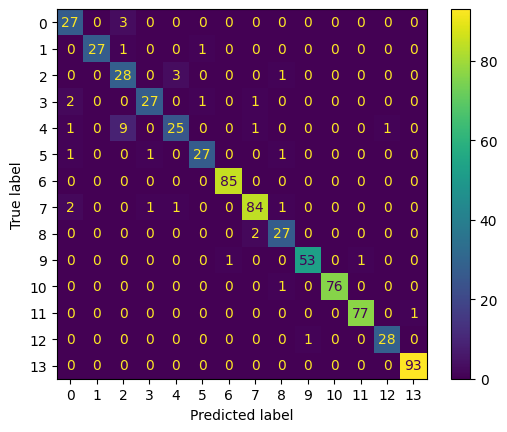

In [ ]:
dtc_pca(df)

An accuracy of 94.48% has been achieved. An obviously worse performance than in the previous attempt. 

This would suggest that PCA is not useful in improving the performance of the model. It seems that all features must remain in raw format in order to be able to extract relevant information about the underlying patterns and make accurate classifications. 

PCA transforms the original set of features into a new set of linearly uncorrelated ones a.k.a. principal components- they aim to capture the most important information. The problem seems to come down to decision boundaries - transformed features do not align with the decision boundaries of the decision tree classifier OR the transformed features do not have enough information to discriminate between different categories of labels.

The confusion matrix shows more missclasiffication. 
More notably, there seem to be even more inaccurate labels for algorithm solvers with smaller sample sizes. This furthers the argument that PCA feature reduction with the specification of 4 principal components is not leading to an improvement of the model. 

# Hyperparameter search with pipeline approach

In order to be able to test whether a different number of principal components can lead to an improvement in the model's performance, a grid search will be executed. 

Since the performance of the model is not satisfactory with 4 principal components, the goal is to see if maybe a higher number of principal components by capturing more variance can help improve the performance, while still maintining the reduction of complexity and the risk of overfitting.

An additional hyperparameter will be included in the grid search as it is important in the context of the decision tree classifier - max_depth. 
It obviously controls the maximum depth of the decision tree. 

Deeper depth can capture more complex relationships between the input features and the target variable. 

However, too deep may overfit, whereas too shallow may underfit the training data and have poor predictive power.

Threfore an optimal value for the depth must be found, and the most convinient way is thorugh a grid search. 

In [ ]:
def dtc_hyper_pca(df):

    X = df.iloc[:,:-1]  # Features
    y = df.iloc[:,-1] # Labels 

    # Encoding nominal categorical labels into numeric format
    encoder = LabelEncoder()
    y = encoder.fit_transform(y)

    # Train/test split
    train_X, test_X, train_y, test_y = model_selection.train_test_split(X, y, test_size=0.3, random_state=4)

    # Feature normalisation via min-max scaling
    scaler = MinMaxScaler()
    train_X = scaler.fit_transform(train_X)
    test_X = scaler.transform(test_X)

    # Create pipeline in order to assemble several steps that can be cross-validated together while setting different parameters
    dtc_hyper_pca = Pipeline([
        ("pca", PCA()),
        ("predictor", DecisionTreeClassifier())
        ])

    # Dictionary of hyperparameters for the pipeline with a decision tree
    dt_param_grid = {"pca__n_components": [15, 50, 95, 150],
                     "predictor__max_depth": [None, 5, 20, 50, 100] 
                     #None signifies that nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples (default for min_split is 2).
                     }

    dt_gs = GridSearchCV(dtc_hyper_pca, dt_param_grid, scoring="accuracy")

    # Run the GridSearchCV
    dt_gs.fit(train_X, train_y)

    # Print the best parameters and the score
    print(dt_gs.best_params_) 
    print(dt_gs.best_score_)

    # To "ASSIGN" the best param found from grid search
    dtc_hyper_pca.set_params(**dt_gs.best_params_)  

    # Repated cross-validation
    rkf = RepeatedKFold(n_splits=5, n_repeats=5, random_state= 4) #  5-fold K-Fold repeated 5 times
    scores = model_selection.cross_val_score(dtc_hyper_pca, train_X, train_y, cv=rkf) 

    #ACTUALLY, Retrain the model using the best hyperparameters found with GridSearchCV and compute the accuracy.
    dtc_hyper_pca.fit(train_X, train_y) # to fit all those onto classifier object/varibale

    # Calculate accuracy on test set
    accuracy = accuracy_score(test_y, dtc_hyper_pca.predict(test_X))

    print("Accuracy:", accuracy)

    # Plotting of the confusion matrix
    predictions = dtc_hyper_pca.predict(test_X)
    cm = confusion_matrix(test_y, predictions, labels=dtc_hyper_pca.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtc_hyper_pca.classes_)
    disp.plot()
    plt.show()

{'pca__n_components': 15, 'predictor__max_depth': 20}
0.9383930609449896
Accuracy: 0.9461325966850829


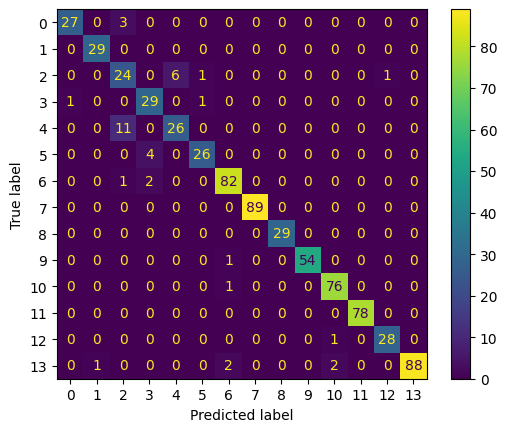

In [ ]:
dtc_hyper_pca(df)

Altough there is an improvement (94.61%) to the model from the pca_n_components = 4 (94.48%), it is still poorer at accuractly classifying than the basic model (96.58%).

In terms of the confusion matrix, the algorithm solver with a true label of 4 ('5clique') seems to be the most problematic.

# Hyperparameter search without PCA

In [ ]:
def dtc_hyper(df):

    X = df.iloc[:,:-1]  # Features
    y = df.iloc[:,-1] # Labels 

    # Encoding nominal categorical labels into numeric format
    encoder = LabelEncoder()
    y = encoder.fit_transform(y)

    # Train/test split
    train_X, test_X, train_y, test_y = model_selection.train_test_split(X, y, test_size=0.3, random_state=4)

    # Feature normalisation via min-max scaling
    scaler = MinMaxScaler()
    train_X = scaler.fit_transform(train_X)
    test_X = scaler.transform(test_X)

    # Create pipeline in order to assemble several steps that can be cross-validated together while setting different parameters
    dtc_hyper = Pipeline([
        ("predictor", DecisionTreeClassifier())
        ])

    # Dictionary of hyperparameters for the pipeline with a decision tree
    dt_param_grid = {"predictor__max_depth": [None, 5, 20, 50, 100] 
                     }

    dt_gs = GridSearchCV(dtc_hyper, dt_param_grid, scoring="accuracy")

    # Run the GridSearchCV
    dt_gs.fit(train_X, train_y)

    # Print the best parameters and the score
    print(dt_gs.best_params_) 
    print(dt_gs.best_score_)

    # To "ASSIGN" the best param found from grid search
    dtc_hyper.set_params(**dt_gs.best_params_)  

    # Repated cross-validation
    rkf = RepeatedKFold(n_splits=5, n_repeats=5, random_state= 4) #  5-fold K-Fold repeated 5 times
    scores = model_selection.cross_val_score(dtc_hyper, train_X, train_y, cv=rkf) 

    #ACTUALLY, Retrain the model using the best hyperparameters found with GridSearchCV and compute the accuracy.
    dtc_hyper.fit(train_X, train_y) # to fit all those onto classifier object/varibale

    # Calculate accuracy on test set
    accuracy = accuracy_score(test_y, dtc_hyper.predict(test_X))

    print("Accuracy:", accuracy)

    # Plotting of the confusion matrix
    predictions = dtc_hyper.predict(test_X)
    cm = confusion_matrix(test_y, predictions, labels=dtc_hyper.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtc_hyper.classes_)
    disp.plot()
    plt.show()

{'predictor__max_depth': 100}
0.9567608378838692
Accuracy: 0.9696132596685083


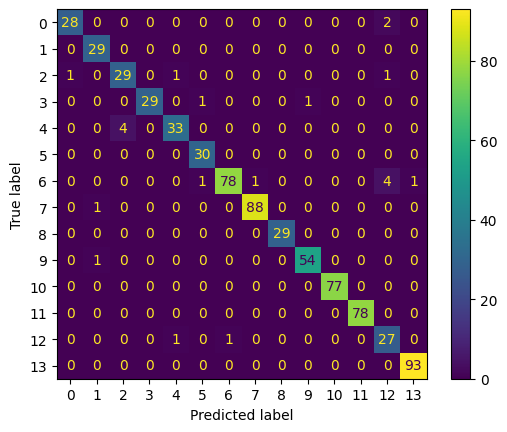

In [ ]:
dtc_hyper(df)

So it does appear that PCA hinders the performance of the model, as the test accuracy is now 96.96%, so PCA should not be included going forward for the reasons mentioned when pca_n_components = 4 was attempted. 

# Wild hyperparameter search 

Many parameters of varying values were set to be tested for their performance in this hyperparameter search - the process of finding optimal values for chosen parameters of the decision tree classifier that result in the best performance of the model on this task. 

In [ ]:
def dtc_multi_hyper(df):

    X = df.iloc[:,:-1]  # Features
    y = df.iloc[:,-1] # Labels 

    # Encoding nominal categorical labels into numeric format
    encoder = LabelEncoder()
    y = encoder.fit_transform(y)

    # Train/test split
    train_X, test_X, train_y, test_y = model_selection.train_test_split(X, y, test_size=0.3, random_state=4)

    # Feature normalisation via min-max scaling
    scaler = MinMaxScaler()
    train_X = scaler.fit_transform(train_X)
    test_X = scaler.transform(test_X)

    # Create pipeline in order to assemble several steps that can be cross-validated together while setting different parameters
    dtc_multi_hyper = Pipeline([
        ("predictor", DecisionTreeClassifier())
        ])

    # Dictionary of hyperparameters for the pipeline with a decision tree
    dt_param_grid = {"predictor__criterion": ["gini", "entropy", "log_loss"],
                     'predictor__splitter': ['best', 'random'],
                     "predictor__max_depth": [None, 5, 20, 50, 100],
                     "predictor__max_features": ['sqrt', 'log2', None]
                     #If “sqrt”, then max_features=sqrt(n_features).
                     #If “log2”, then max_features=log2(n_features).
                     #If None, then max_features=n_features.
                     # note: search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than max_features features.
                     }

    dt_gs = GridSearchCV(dtc_multi_hyper, dt_param_grid, scoring="accuracy")

    # Run the GridSearchCV
    dt_gs.fit(train_X, train_y)

    # Print the best parameters and the score
    print(dt_gs.best_params_) 
    print(dt_gs.best_score_)

    # To "ASSIGN" the best param found from grid search
    dtc_multi_hyper.set_params(**dt_gs.best_params_)  

    # Repated cross-validation
    rkf = RepeatedKFold(n_splits=5, n_repeats=5, random_state= 4) #  5-fold K-Fold repeated 5 times
    scores = model_selection.cross_val_score(dtc_multi_hyper, train_X, train_y, cv=rkf) 

    #ACTUALLY, Retrain the model using the best hyperparameters found with GridSearchCV and compute the accuracy.
    dtc_multi_hyper.fit(train_X, train_y) # to fit all those onto classifier object/varibale

    # Calculate accuracy on test set
    accuracy = accuracy_score(test_y, dtc_multi_hyper.predict(test_X))

    print("Accuracy:", accuracy)

    # Plotting of the confusion matrix
    predictions = dtc_multi_hyper.predict(test_X)
    cm = confusion_matrix(test_y, predictions, labels=dtc_multi_hyper.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtc_multi_hyper.classes_)
    disp.plot()
    plt.show()

{'predictor__criterion': 'entropy', 'predictor__max_depth': None, 'predictor__max_features': None, 'predictor__splitter': 'random'}
0.9834091268238723
Accuracy: 0.9806629834254144


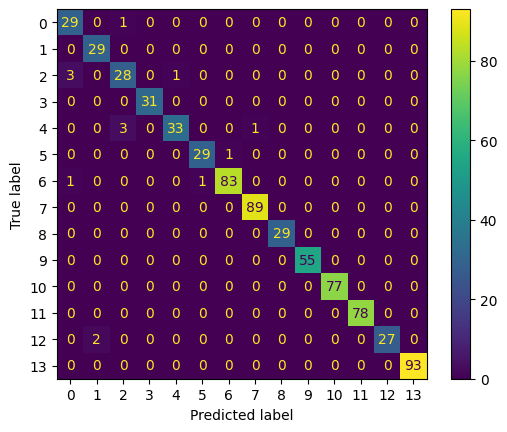

In [ ]:
dtc_multi_hyper(df)

The training accuracy is 98.34%, and with a test accuracy of 98.1%. 
While this is an improvemnt to the basic model.

The slight difference between training and test accuracy does not necessarily indicate overfitting. In fact, the difference is quite small, which suggests that the model generalizes well to unseen data. 

Moreover, the relatively low number of misclassified instances in the confusion matrix supports the notion that the model is performing well.

So far, the greatest improvement in performance was achieved via a hyperparameter search without PCA with the optimal hyperparameter values denoted above. 

# Testing to see if pushing max_features will improve performance

In [ ]:
def dtc_multi_hyper_push(df):

    X = df.iloc[:,:-1]  # Features
    y = df.iloc[:,-1] # Labels 

    # Encoding nominal categorical labels into numeric format
    encoder = LabelEncoder()
    y = encoder.fit_transform(y)

    # Train/test split
    train_X, test_X, train_y, test_y = model_selection.train_test_split(X, y, test_size=0.3, random_state=4)

    # Feature normalisation via min-max scaling
    scaler = MinMaxScaler()
    train_X = scaler.fit_transform(train_X)
    test_X = scaler.transform(test_X)

    # Create pipeline in order to assemble several steps that can be cross-validated together while setting different parameters
    dtc_multi_hyper_push = Pipeline([
        ("predictor", DecisionTreeClassifier())
        ])

    # Dictionary of hyperparameters for the pipeline with a decision tree
    dt_param_grid = {"predictor__criterion": ["gini", "entropy", "log_loss"],
                     'predictor__splitter': ['best', 'random'],
                     "predictor__max_depth": [None, 5, 20, 50, 100,130,180],
                     "predictor__max_features": ['sqrt', 'log2', None]
                     #If “sqrt”, then max_features=sqrt(n_features).
                     #If “log2”, then max_features=log2(n_features).
                     #If None, then max_features=n_features.
                     # note: search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than max_features features.
                     }

    dt_gs = GridSearchCV(dtc_multi_hyper_push, dt_param_grid, scoring="accuracy")

    # Run the GridSearchCV
    dt_gs.fit(train_X, train_y)

    # Print the best parameters and the score
    print(dt_gs.best_params_) 
    print(dt_gs.best_score_)

    # To "ASSIGN" the best param found from grid search
    dtc_multi_hyper_push.set_params(**dt_gs.best_params_)  

    # Repated cross-validation
    rkf = RepeatedKFold(n_splits=5, n_repeats=5, random_state= 4) #  5-fold K-Fold repeated 5 times
    scores = model_selection.cross_val_score(dtc_multi_hyper_push, train_X, train_y, cv=rkf) 

    #ACTUALLY, Retrain the model using the best hyperparameters found with GridSearchCV and compute the accuracy.
    dtc_multi_hyper_push.fit(train_X, train_y) # to fit all those onto classifier object/varibale

    # Calculate accuracy on test set
    accuracy = accuracy_score(test_y, dtc_multi_hyper_push.predict(test_X))

    print("Accuracy:", accuracy)

    # Plotting of the confusion matrix
    predictions = dtc_multi_hyper_push.predict(test_X)
    cm = confusion_matrix(test_y, predictions, labels=dtc_multi_hyper_push.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtc_multi_hyper_push.classes_)
    disp.plot()
    plt.show()

{'predictor__criterion': 'entropy', 'predictor__max_depth': 180, 'predictor__max_features': None, 'predictor__splitter': 'random'}
0.985191298087897
Accuracy: 0.9903314917127072


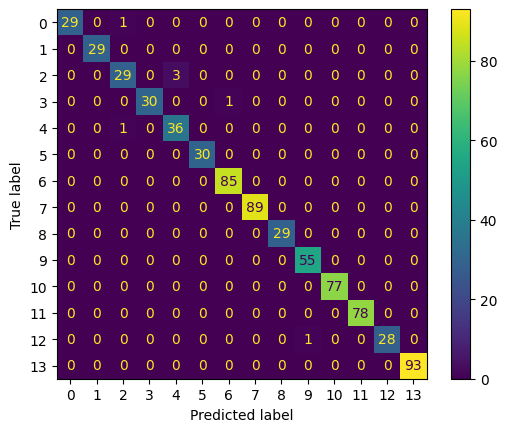

In [ ]:
dtc_multi_hyper_push(df)

Apparently, pushing the max_features values beyond 100 to see if they'll be chosen as the optimal value for this parameter lead to a noticable improvement in perfromance. max_features = 180 was chosen as the optimal value. 

Overall, a test accuracy of 99.03% was acomplished, with very little missclassifications in the confusion matrix. 



---



## New classifier (10 Marks)

Replicate the previous task for a classifier different than K-NN and decision trees. Briefly describe your choice.
Try to create the best model for the given dataset.


Save your best model into your github. And create a single code cell that loads it and evaluate it on the following test dataset:
https://github.com/andvise/DataAnalyticsDatasets/blob/main/test_dataset.csv

This link currently contains a sample of the training set. The real test set will be released after the submission. I should be able to run the code cell independently, load all the libraries you need as well.



---



# Random Forest Classifier

Considering the relatively high accuracy acomplished using the decision tree classifer, this leads to a natural extenstion to random forest classifier. 

RandomForestClassifier is an ensemble algorithm. In essence, the forest is represented by multiple decision trees. To create each tree, a random subset of features is selected at each split, as well as being trained on a random subset of training data, with replacement, so some instances may be included multiple times, while others may not be included at all. 

Overall, this helps to create a diverse set of trees in the forest where each is trained on marginally different subsets of the data, which decreases risk of overfitting whilst improving accuracy and ability to generalize on unseen data.

The final labelling is done by the majority vote of all the individual decision trees in the forest- each tree gets a vote and the class with the most votes is selected as the final label.

# Basic model recreation

In [ ]:
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier

def random_forest_basic(df):

    X = df.iloc[:,:-1]  # Features
    y = df.iloc[:,-1] # Labels 

    # Encoding nominal categorical labels into numeric format
    encoder = LabelEncoder()
    y = encoder.fit_transform(y)

    # Train/test split
    train_X, test_X, train_y, test_y = model_selection.train_test_split(X, y, test_size=0.3, random_state=4)

    # Creating the decision tree clasifier object
    random_forest_basic = ensemble.RandomForestClassifier()

    # Training the classifier
    random_forest_basic = random_forest_basic.fit(train_X, train_y) 
    clf_score = print('Test Accuracy:', random_forest_basic.score(test_X, test_y))

    # Plotting of the confusion matrix
    predictions = random_forest_basic.predict(test_X)
    cm = confusion_matrix(test_y, predictions, labels=random_forest_basic.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=random_forest_basic.classes_)
    disp.plot()
    plt.show()

Test Accuracy: 0.9986187845303868


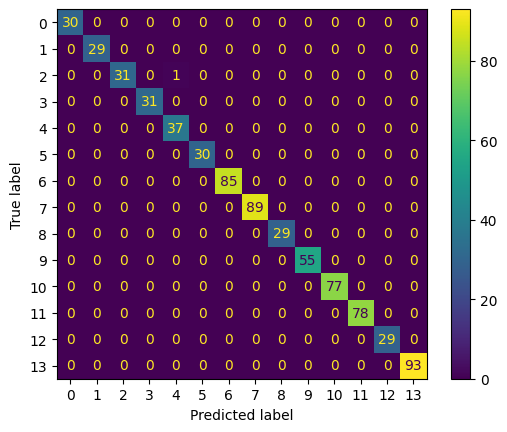

In [ ]:
random_forest_basic(df)

The defined algorithm with its 'basic' properties already performs exceptionally well with a 99.86% test accuracy.

# Class weight modification

By default, the random forest class assigns all classes a weight one.

Given that having an imbalaced dataset can lower the performance of the model, it is useful to test the impact of this by assigning the “class_weight” argument to the value “balanced”, which ensure each class gets an equal weighting during the training of the model.

In [ ]:
def random_forest_estimator_weights(df):

    X = df.iloc[:,:-1]  # Features
    y = df.iloc[:,-1] # Labels 

    # Encoding nominal categorical labels into numeric format
    encoder = LabelEncoder()
    y = encoder.fit_transform(y)

    # Train/test split
    train_X, test_X, train_y, test_y = model_selection.train_test_split(X, y, test_size=0.3, random_state=4)

    # Feature normalisation via min-max scaling
    scaler = MinMaxScaler()
    train_X = scaler.fit_transform(train_X)
    test_X = scaler.transform(test_X)

    # Creating the decision tree clasifier object
    random_forest_estimator = ensemble.RandomForestClassifier(n_estimators = 3, class_weight = 'balanced')
    # setting the number of estimators to 3 as this was optimal from previous step

    # Training the classifier
    random_forest_estimator = random_forest_estimator.fit(train_X, train_y) 
    clf_score = print('Test Accuracy:', random_forest_estimator.score(test_X, test_y))

    # Plotting of the confusion matrix
    predictions = random_forest_estimator.predict(test_X)
    cm = confusion_matrix(test_y, predictions, labels=random_forest_estimator.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=random_forest_estimator.classes_)
    disp.plot()
    plt.show()

Test Accuracy: 0.9903314917127072


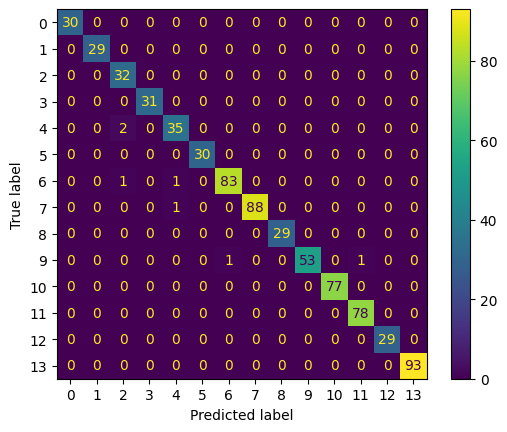

In [ ]:
random_forest_estimator_weights(df)

A lower test accuracy of 99.03% was achieved. 

Retaining the basic model without the class weight modification shows to be the optimal model for the given task. 

# Recreating best performing task 2- robust evaluation algorithm using random forest classifier

Recreating the conditions as much as possible from the best performing decision tree algorithm, but using a random forest classifier instead.

This serves to see if recreating the conditions from task 2 optimization can bring about the same improvement in performance as it did in task 2


In [ ]:
def random_forest_clf(df):

    X = df.iloc[:,:-1]  # Features
    y = df.iloc[:,-1] # Labels 

    # Encoding nominal categorical labels into numeric format
    encoder = LabelEncoder()
    y = encoder.fit_transform(y)

    # Train/test split
    train_X, test_X, train_y, test_y = model_selection.train_test_split(X, y, test_size=0.3, random_state=4)
    
    # Feature normalisation via min-max scaling
    scaler = MinMaxScaler()
    train_X = scaler.fit_transform(train_X)
    test_X = scaler.transform(test_X)

    # Create pipeline in order to assemble several steps that can be cross-validated together while setting different parameters
    random_forest_clf = Pipeline([
        ("predictor", RandomForestClassifier())
        ])

    # Dictionary of hyperparameters for the pipeline with a decision tree
    dt_param_grid = {"predictor__criterion": ["gini", "entropy", "log_loss"],
                     'predictor__n_estimators': [1,3,5],
                     "predictor__max_depth": [None, 5, 20, 50, 100,130,180],
                     "predictor__max_features": ['sqrt', 'log2', None]
                     }

    dt_gs = GridSearchCV(random_forest_clf, dt_param_grid, scoring="accuracy")

    # Run the GridSearchCV
    dt_gs.fit(train_X, train_y)

    # Print the best parameters and the score
    print(dt_gs.best_params_) 
    print(dt_gs.best_score_)

    # To "ASSIGN" the best param found from grid search
    random_forest_clf.set_params(**dt_gs.best_params_)  

    # Repated cross-validation
    rkf = RepeatedKFold(n_splits=5, n_repeats=5, random_state= 4) #  5-fold K-Fold repeated 5 times
    scores = model_selection.cross_val_score(random_forest_clf, train_X, train_y, cv=rkf) 

    #ACTUALLY, Retrain the model using the best hyperparameters found with GridSearchCV and compute the accuracy.
    random_forest_clf.fit(train_X, train_y) # to fit all those onto classifier object/varibale

    # Calculate accuracy on test set
    accuracy = accuracy_score(test_y, random_forest_clf.predict(test_X))

    print("Accuracy:", accuracy)

    # Plotting of the confusion matrix
    predictions = random_forest_clf.predict(test_X)
    cm = confusion_matrix(test_y, predictions, labels=random_forest_clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=random_forest_clf.classes_)
    disp.plot()
    plt.show()



{'predictor__criterion': 'log_loss', 'predictor__max_depth': 20, 'predictor__max_features': 'log2', 'predictor__n_estimators': 5}
0.9922971573051464
Accuracy: 0.9958563535911602


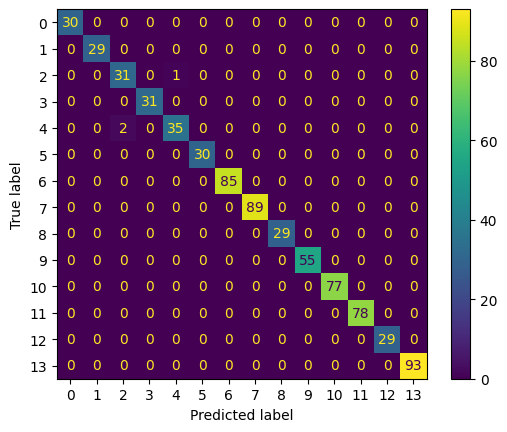

In [ ]:
random_forest_clf(df)

Very high levels of accuracy have been achieved - 99.59%.

Based on its performance from the confusion matrix, this model seems to be performing quite well; even more so than the decision tree model.

In comparison to the decision tree classifier model from task 2 where the highest test accuracy achieved was 99.03%, here for a random forest classifier it is accuracy of 99.59%.

## Creation of the best model

{'predictor__criterion': 'log_loss', 'predictor__max_depth': 50, 'predictor__max_features': 'sqrt', 'predictor__n_estimators': 15}
0.9982213404034905
Accuracy: 0.9972375690607734


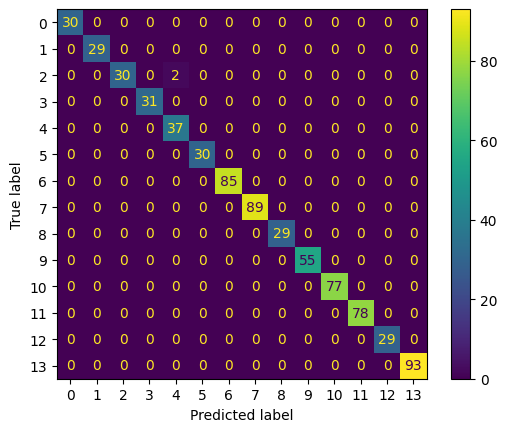

['best_model.joblib']

In [ ]:
# Prepare the environment: 

import joblib
from joblib import dump, load
from io import BytesIO
import pandas as pd
import numpy as np
import requests
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, chi2
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv("https://raw.githubusercontent.com/andvise/DataAnalyticsDatasets/main/train_dataset.csv", index_col=0)


df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.fillna(0)

## Model build

X = df.iloc[:,:-1]  # Features
y = df.iloc[:,-1] # Labels 

# Encoding nominal categorical labels into numeric format
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Train/test split
train_X, test_X, train_y, test_y = model_selection.train_test_split(X, y, test_size=0.3, random_state=4)

# Feature normalisation via min-max scaling
scaler = MinMaxScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

# Create pipeline in order to assemble several steps that can be cross-validated together while setting different parameters
random_forest_clf = Pipeline([
    ("predictor", RandomForestClassifier())
    ])

# Dictionary of hyperparameters for the pipeline with a decision tree
dt_param_grid = {"predictor__criterion": ["gini", "entropy", "log_loss"],
                  'predictor__n_estimators': [5,9,13,15,18], #further extension of the number of estimators
                  "predictor__max_depth": [None, 5, 20, 50, 100, 130],
                  "predictor__max_features": ['sqrt', 'log2', None]
                  }

dt_gs = GridSearchCV(random_forest_clf, dt_param_grid, scoring="accuracy")

# Run the GridSearchCV
dt_gs.fit(train_X, train_y)

# Print the best parameters and the score
print(dt_gs.best_params_) 
print(dt_gs.best_score_)

# To "ASSIGN" the best param found from grid search
random_forest_clf.set_params(**dt_gs.best_params_)  

# Repated cross-validation
rkf = RepeatedKFold(n_splits=5, n_repeats=5, random_state= 4) #  5-fold K-Fold repeated 5 times
scores = model_selection.cross_val_score(random_forest_clf, train_X, train_y, cv=rkf) 

#ACTUALLY, Retrain the model using the best hyperparameters found with GridSearchCV and compute the accuracy.
random_forest_clf.fit(train_X, train_y) # to fit all those onto classifier object/varibale

# Calculate accuracy on test set
accuracy = accuracy_score(test_y, random_forest_clf.predict(test_X))

print("Accuracy:", accuracy)

# Plotting of the confusion matrix
predictions = random_forest_clf.predict(test_X)
cm = confusion_matrix(test_y, predictions, labels=random_forest_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=random_forest_clf.classes_)
disp.plot()
plt.show()


# Save your model to a file
joblib.dump(random_forest_clf, 'best_model.joblib')

When evaluating the model, the training accuracy is 99.82%, whereas the test accuracy is 99.72%.

As mentioned previously, the slight discrepancy between training and test accuracy does not necessarily connote overfitting - given that the difference is relatively small and the low number of misclassified instances in the confusion matrix, the model seems to generalize well to unseen data. 



---



# <font color="blue">FOR GRADING ONLY</font>

Save your best model into your github. And create a single code cell that loads it and evaluate it on the following test dataset: 
https://github.com/andvise/DataAnalyticsDatasets/blob/main/test_dataset.csv


In [ ]:
from joblib import dump, load
from io import BytesIO
import pandas as pd
import numpy as np
import requests

# INSERTTING MY BEST MODEL'S URL
mLink = 'https://github.com/ilic-n-ucc/data_mining_assignment/blob/4975a38f2d1c51cb9c7c9f9b5e94d34c7dcc8c8c/best_model-3.joblib?raw=true'
mfile = BytesIO(requests.get(mLink).content)
model = load(mfile)

# Loading the dataset and replicating my preprocessing
df = pd.read_csv("https://github.com/andvise/DataAnalyticsDatasets/blob/main/test_dataset.csv?raw=true", index_col=0)
df = df.replace([np.inf, -np.inf], 0)
df = df.fillna(0)
X = df.iloc[:,:-1]
y = df['target']

# Evaluating my model or pipeline
model.score(X,y)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


0.0

Just in case, it should be noted that for reasons not clear to me, a warning appears when evaluating the 'best model' onto the test set...

On the other hand, the basic random forest model when evaluated produces no warning of such sort, as can be seen below:

In [ ]:
from joblib import dump, load
from io import BytesIO
import pandas as pd
import numpy as np
import requests

# INSERTTING MY MODEL'S URL
mLink = 'https://github.com/ilic-n-ucc/data_mining_assignment/blob/3b33c9d067f771ef199ab6b0fd5ffe0e8797273b/bestmodel.joblib?raw=true'
mfile = BytesIO(requests.get(mLink).content)
model = load(mfile)

# Loading the dataset and replicating my preprocessing
df = pd.read_csv("https://github.com/andvise/DataAnalyticsDatasets/blob/main/test_dataset.csv?raw=true", index_col=0)
df = df.replace([np.inf, -np.inf], 0)
df = df.fillna(0)
X = df.iloc[:,:-1]
y = df['target']

# Evaluating my model or pipeline
model.score(X,y)

0.0



---

